In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme()

path = "../reports/figures/eda/"

In [11]:
train = pd.read_csv("../data/raw/creditcard.csv")
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


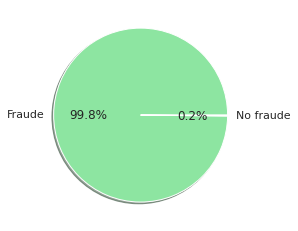

In [12]:
y = train['Class'].value_counts().values
colors = sns.color_palette('pastel')[2:5]
plt.pie(y, labels = ["Fraude", "No fraude"], autopct='%0.1f%%', shadow=True, startangle=0, colors = colors)
plt.savefig(path + "piclasses.png")

/home/sium/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sium/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


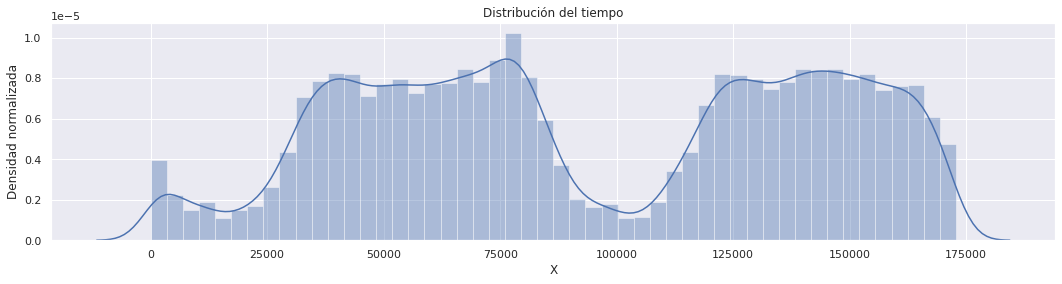

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(18,4))

amount_val = train['Amount'].values
sns.distplot(amount_val, color='r')
plt.xlabel('X') 
plt.ylabel('Densidad normalizada')
plt.title('Distribución del importe')
plt.savefig(path + "importedist.png")
plt.clf()

time_val = train['Time'].values
sns.distplot(time_val, color='b')
plt.xlabel('X') 
plt.ylabel('Densidad normalizada')
plt.title('Distribución del tiempo')
plt.savefig(path + "timedist.png")

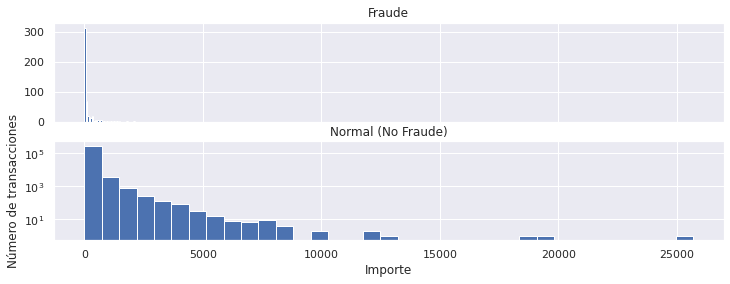

In [7]:
fig, (axis_1, axis_2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 35

axis_1.hist(train.Amount[train.Class == 1], bins = bins)
axis_1.set_title('Fraude')

axis_2.hist(train.Amount[train.Class == 0], bins = bins)
axis_2.set_title('Normal (No Fraude)')

plt.xlabel('Importe')
plt.ylabel('Número de transacciones')
plt.yscale("log")
plt.savefig(path + "disfn.png")
plt.show()

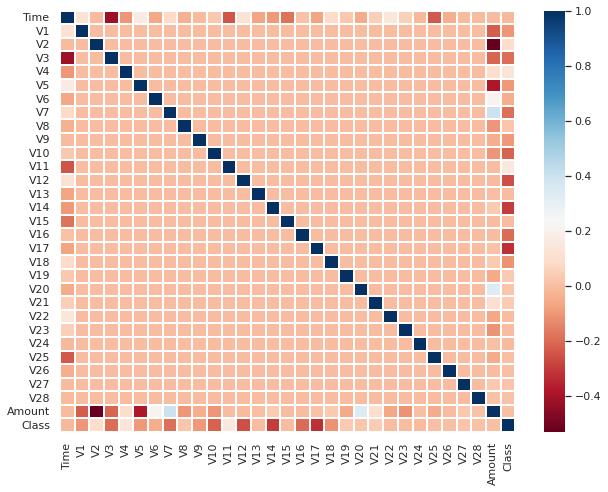

In [13]:
corr = train.corr()
fig, ax = plt.subplots(figsize=(9,7))

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, cmap="RdBu", ax=ax)
plt.savefig(path + "corr.png")
plt.tight_layout()